In [334]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [335]:
pitchers = pd.read_csv("/Users/lancesanterre/so_predict/data/training/helper_data/pitcher_clustering_data.csv")
print(f"pitchers number: {pitchers.shape}")

pitchers number: (149, 83)


In [336]:
pitchers.columns
pitchers = pitchers.dropna()
pitchers_data = pitchers.drop(columns=[
    'Unnamed: 0', 'player_id', 'player_name', 'pitcher_name', 'PlayerID'
])
pitchers_data = pitchers_data.drop(columns=['kmeans_cluster', 'gmm_cluster', 'PCA1', 'PCA2']) 


In [337]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(pitchers_data)

In [338]:
pca = PCA(n_components=0.35) 
X_reduced = pca.fit_transform(X_scaled)

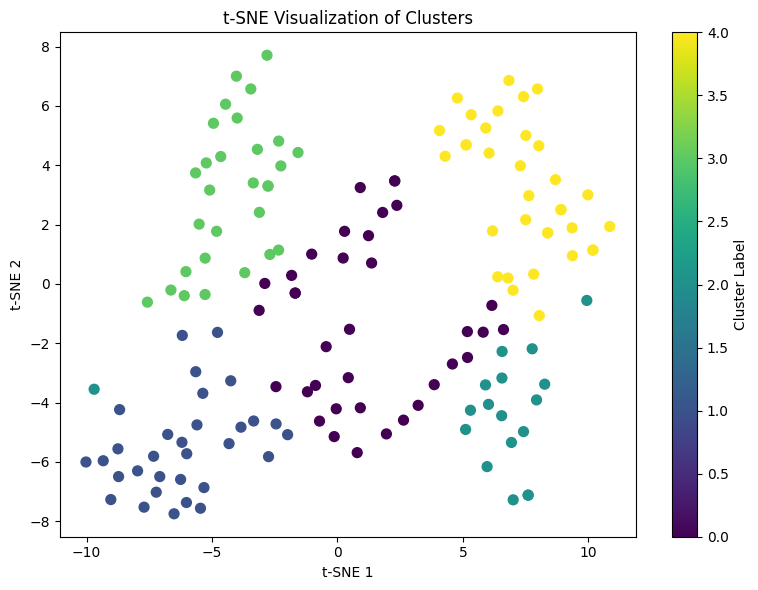

In [339]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_reduced)

# t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X_reduced)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', s=50)
plt.title("t-SNE Visualization of Clusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(label="Cluster Label")
plt.tight_layout()
plt.show()


In [340]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_reduced, labels)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.3563


In [341]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for k in range(2, 10):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_reduced)
    score = silhouette_score(X_reduced, labels)
    print(f"k={k} → Silhouette Score: {score:.4f}")


k=2 → Silhouette Score: 0.3902
k=3 → Silhouette Score: 0.3618
k=4 → Silhouette Score: 0.3728
k=5 → Silhouette Score: 0.3563
k=6 → Silhouette Score: 0.3521
k=7 → Silhouette Score: 0.3600
k=8 → Silhouette Score: 0.3433
k=9 → Silhouette Score: 0.3649


In [342]:
pitchers

,Unnamed: 0,pitches,player_id,player_name,total_pitches,pitch_percent,ba,iso,babip,slg,...,swing_path_tilt,rate_ideal_attack_angle,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,pitcher_name,PlayerID,kmeans_cluster,PCA1,PCA2,gmm_cluster
0,0,17600,605400,"Nola, Aaron",17629,99.8,0.236,0.165,0.296,0.401,...,33.310351,0.537210,37.374921,33.150469,aaron nola,nolaaa01,2,3.592482,-0.770149,8
1,1,17543,554430,"Wheeler, Zack",17577,99.8,0.223,0.127,0.287,0.349,...,31.874198,0.467686,35.711489,27.278579,zack wheeler,wheelza01,2,2.745188,0.310784,4
2,2,17519,622491,"Castillo, Luis",17562,99.8,0.226,0.154,0.285,0.380,...,32.101766,0.461920,37.093872,28.460194,luis castillo,castilu02,2,3.995552,1.798188,8
3,3,17243,621244,"Berríos, José",17271,99.8,0.245,0.162,0.289,0.407,...,33.228691,0.505297,36.845077,30.011795,josé berríos,berrijo01,2,3.431258,-0.793379,8
4,4,16696,571578,"Corbin, Patrick",16758,99.6,0.282,0.188,0.322,0.470,...,33.846452,0.476699,36.956218,32.320576,patrick corbin,corbipa01,2,3.630256,-1.432809,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,144,8128,622663,"Severino, Luis",8145,99.8,0.245,0.161,0.285,0.406,...,31.830433,0.485037,36.197541,26.686562,luis severino,severlu01,3,-0.604736,0.398442,0
145,145,7340,686613,"Brown, Hunter",7344,99.9,0.235,0.141,0.302,0.376,...,31.411658,0.461604,36.494390,26.093607,hunter brown,brownhu01,3,-0.860305,-0.318692,7
146,146,6442,657376,"Schmidt, Clarke",6451,99.9,0.241,0.150,0.293,0.391,...,31.964253,0.508642,36.568298,29.315653,clarke schmidt,schmicl01,3,-1.029966,2.546085,0
147,147,12580,543135,"Eovaldi, Nathan",12597,99.9,0.242,0.165,0.294,0.407,...,32.796440,0.456871,36.586341,31.162837,nathan eovaldi,eovalna01,2,1.533119,-1.162331,8


In [343]:
pitchers

,Unnamed: 0,pitches,player_id,player_name,total_pitches,pitch_percent,ba,iso,babip,slg,...,swing_path_tilt,rate_ideal_attack_angle,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,pitcher_name,PlayerID,kmeans_cluster,PCA1,PCA2,gmm_cluster
0,0,17600,605400,"Nola, Aaron",17629,99.8,0.236,0.165,0.296,0.401,...,33.310351,0.537210,37.374921,33.150469,aaron nola,nolaaa01,2,3.592482,-0.770149,8
1,1,17543,554430,"Wheeler, Zack",17577,99.8,0.223,0.127,0.287,0.349,...,31.874198,0.467686,35.711489,27.278579,zack wheeler,wheelza01,2,2.745188,0.310784,4
2,2,17519,622491,"Castillo, Luis",17562,99.8,0.226,0.154,0.285,0.380,...,32.101766,0.461920,37.093872,28.460194,luis castillo,castilu02,2,3.995552,1.798188,8
3,3,17243,621244,"Berríos, José",17271,99.8,0.245,0.162,0.289,0.407,...,33.228691,0.505297,36.845077,30.011795,josé berríos,berrijo01,2,3.431258,-0.793379,8
4,4,16696,571578,"Corbin, Patrick",16758,99.6,0.282,0.188,0.322,0.470,...,33.846452,0.476699,36.956218,32.320576,patrick corbin,corbipa01,2,3.630256,-1.432809,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,144,8128,622663,"Severino, Luis",8145,99.8,0.245,0.161,0.285,0.406,...,31.830433,0.485037,36.197541,26.686562,luis severino,severlu01,3,-0.604736,0.398442,0
145,145,7340,686613,"Brown, Hunter",7344,99.9,0.235,0.141,0.302,0.376,...,31.411658,0.461604,36.494390,26.093607,hunter brown,brownhu01,3,-0.860305,-0.318692,7
146,146,6442,657376,"Schmidt, Clarke",6451,99.9,0.241,0.150,0.293,0.391,...,31.964253,0.508642,36.568298,29.315653,clarke schmidt,schmicl01,3,-1.029966,2.546085,0
147,147,12580,543135,"Eovaldi, Nathan",12597,99.9,0.242,0.165,0.294,0.407,...,32.796440,0.456871,36.586341,31.162837,nathan eovaldi,eovalna01,2,1.533119,-1.162331,8


In [344]:
pitchers_data["player_name"] = pitchers["player_name"]

In [345]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import pandas as pd
import plotly.express as px

# 1. KMeans clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_reduced) 

# 2. t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_reduced)

# 3. Create a DataFrame for visualization
df_plot = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_plot['Pitcher'] = pitchers_data['player_name'].values  
df_plot['Cluster'] = labels

# 4. Plot with Plotly
fig = px.scatter(
    df_plot,
    x='TSNE1',
    y='TSNE2',
    color='Cluster',
    hover_name='Pitcher',
    title='t-SNE Visualization of Pitchers (k=4 Clusters)',
    color_continuous_scale='Viridis'
)

fig.show()


In [346]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_reduced, labels)
print(f"Silhouette Score (k=4): {score:.4f}")


Silhouette Score (k=4): 0.3728


In [347]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=42)
labels_gmm = gmm.fit_predict(X_reduced)

from sklearn.metrics import silhouette_score
score_gmm = silhouette_score(X_reduced, labels_gmm)
print(f"GMM Silhouette Score: {score_gmm:.4f}")

GMM Silhouette Score: 0.2604


In [348]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4)
labels_agg = agg.fit_predict(X_reduced)

score_agg = silhouette_score(X_reduced, labels_agg)
print(f"Agglomerative Clustering Silhouette Score: {score_agg:.4f}")


Agglomerative Clustering Silhouette Score: 0.3320


In [349]:
!pip install hdbscan


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [350]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
labels_hdb = clusterer.fit_predict(X_reduced)

# Filter out noise points for silhouette
mask = labels_hdb != -1
score_hdb = silhouette_score(X_reduced[mask], labels_hdb[mask])
print(f"HDBSCAN Silhouette Score (excluding noise): {score_hdb:.4f}")


HDBSCAN Silhouette Score (excluding noise): 0.4227


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [351]:
from sklearn.cluster import SpectralClustering

spec = SpectralClustering(n_clusters=4, assign_labels='kmeans', random_state=42)
labels_spec = spec.fit_predict(X_reduced)

score_spec = silhouette_score(X_reduced, labels_spec)
print(f"Spectral Clustering Silhouette Score: {score_spec:.4f}")


Spectral Clustering Silhouette Score: 0.3579


In [352]:
import hdbscan
from sklearn.metrics import silhouette_score

best_score = -1
best_size = None
best_labels = None

for size in range(3, 20):  
    clusterer = hdbscan.HDBSCAN(min_cluster_size=size)
    labels = clusterer.fit_predict(X_reduced)
    
    mask = labels != -1
    if len(set(labels[mask])) > 1:  # must have at least 2 clusters
        score = silhouette_score(X_reduced[mask], labels[mask])
        print(f"min_cluster_size={size} → Silhouette Score: {score:.4f}")

        if score > best_score:
            best_score = score
            best_size = size
            best_labels = labels


min_cluster_size=3 → Silhouette Score: 0.4256
min_cluster_size=4 → Silhouette Score: 0.4521
min_cluster_size=5 → Silhouette Score: 0.4227
min_cluster_size=6 → Silhouette Score: 0.4483
min_cluster_size=7 → Silhouette Score: 0.4915
min_cluster_size=8 → Silhouette Score: 0.5035
min_cluster_size=9 → Silhouette Score: 0.5624
min_cluster_size=10 → Silhouette Score: 0.5513
min_cluster_size=11 → Silhouette Score: 0.5485
min_cluster_size=12 → Silhouette Score: 0.5383


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3

In [353]:
for size in range(3, 20):
    for samples in [None, 1, 3, 5, 10]:
        clusterer = hdbscan.HDBSCAN(min_cluster_size=size, min_samples=samples)
        labels = clusterer.fit_predict(X_reduced)
        
        mask = labels != -1
        if len(set(labels[mask])) > 1:
            score = silhouette_score(X_reduced[mask], labels[mask])
            print(f"size={size}, samples={samples} → Score: {score:.4f}")


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3

size=3, samples=None → Score: 0.4256
size=3, samples=1 → Score: 0.5067
size=3, samples=3 → Score: 0.4256
size=3, samples=5 → Score: 0.5419
size=3, samples=10 → Score: 0.2744
size=4, samples=None → Score: 0.4521
size=4, samples=1 → Score: 0.4448
size=4, samples=3 → Score: 0.4256
size=4, samples=5 → Score: 0.4227
size=4, samples=10 → Score: 0.5054
size=5, samples=None → Score: 0.4227
size=5, samples=1 → Score: 0.4081
size=5, samples=3 → Score: 0.3181
size=5, samples=5 → Score: 0.4227
size=5, samples=10 → Score: 0.5054
size=6, samples=None → Score: 0.4483
size=6, samples=1 → Score: 0.4002
size=6, samples=3 → Score: 0.3724
size=6, samples=5 → Score: 0.4227
size=6, samples=10 → Score: 0.5054
size=7, samples=None → Score: 0.4915
size=7, samples=1 → Score: 0.4227
size=7, samples=3 → Score: 0.3724


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3

size=7, samples=5 → Score: 0.3197
size=7, samples=10 → Score: 0.5513
size=8, samples=None → Score: 0.5035
size=8, samples=1 → Score: 0.3406
size=8, samples=3 → Score: 0.3484
size=8, samples=5 → Score: 0.3197
size=8, samples=10 → Score: 0.5513
size=9, samples=None → Score: 0.5624
size=9, samples=1 → Score: 0.3488
size=9, samples=3 → Score: 0.3637
size=9, samples=5 → Score: 0.3197
size=9, samples=10 → Score: 0.5513
size=10, samples=None → Score: 0.5513
size=10, samples=1 → Score: 0.3488
size=10, samples=3 → Score: 0.3637
size=10, samples=5 → Score: 0.3197
size=10, samples=10 → Score: 0.5513
size=11, samples=None → Score: 0.5485
size=11, samples=1 → Score: 0.3369
size=11, samples=3 → Score: 0.3372
size=11, samples=5 → Score: 0.3197
size=11, samples=10 → Score: 0.5513
size=12, samples=None → Score: 0.5383
size=12, samples=1 → Score: 0.3369
size=12, samples=3 → Score: 0.3372
size=12, samples=5 → Score: 0.4424
size=12, samples=10 → Score: 0.5513
size=13, samples=1 → Score: 0.3369
size=13, sa

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3

In [354]:
import hdbscan

final_model = hdbscan.HDBSCAN(min_cluster_size=9)
final_labels = final_model.fit_predict(X_reduced)

pitchers_data['final_cluster'] = final_labels

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [355]:
import plotly.express as px

df_plot = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_plot['Pitcher'] = pitchers_data['player_name'].values
df_plot['Cluster'] = final_labels

fig = px.scatter(
    df_plot,
    x='TSNE1',
    y='TSNE2',
    color='Cluster',
    hover_name='Pitcher',
    title='🏆 HDBSCAN Final Clustering (Silhouette: 0.5624)',
    color_continuous_scale='Viridis'
)
fig.show()


In [356]:
import pandas as pd
import numpy as np
import hdbscan

def recursive_hdbscan_clustering(pitchers_data, X_reduced, min_cluster_size=3, min_samples=10, max_cluster_size_threshold=50):
    final_clusters = []  
    remaining_data = pitchers_data.copy().reset_index(drop=True)
    remaining_X = X_reduced.copy()
    cluster_counter = 0
    iteration = 0

    while True:
        print(f"\n🔁 Iteration {iteration + 1}: Clustering {len(remaining_data)} pitchers...")

        # Run HDBSCAN
        clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
        labels = clusterer.fit_predict(remaining_X)
        label_counts = pd.Series(labels).value_counts()
        print("📊 Cluster sizes:\n", label_counts)

        # Stop if largest cluster is under the threshold
        if label_counts[label_counts != -1].max() < max_cluster_size_threshold:
            print("✅ Largest cluster under threshold. Finalizing.")
            break

        # Extract valid clusters and assign unique cluster ID
        for label in label_counts.index:
            if label == -1:
                continue
            cluster_indices = np.where(labels == label)[0]
            clustered = remaining_data.iloc[cluster_indices].copy()

            
            if 'player_name' not in clustered.columns or 'player_id' not in clustered.columns:
                raise ValueError("⚠️ Missing 'player_name' or 'player_id' in clustered data!")

            clustered["cluster"] = cluster_counter
            final_clusters.append(clustered)
            cluster_counter += 1

        # Keep only noise pitchers for next iteration
        noise_indices = np.where(labels == -1)[0]
        if len(noise_indices) == 0:
            print("🛑 No more noise left to cluster.")
            break
        remaining_data = remaining_data.iloc[noise_indices].reset_index(drop=True)
        remaining_X = remaining_X[noise_indices]
        iteration += 1

    
    if len(remaining_data) > 0:
        print(f"🔘 Adding final noise group of size {len(remaining_data)} as cluster {cluster_counter}")
        remaining_data["cluster"] = cluster_counter

    
        if 'player_name' not in remaining_data.columns or 'player_id' not in remaining_data.columns:
            raise ValueError("⚠️ Missing 'player_name' or 'player_id' in final noise group!")
        final_clusters.append(remaining_data)

    # Combine all clusters
    result_df = pd.concat(final_clusters, ignore_index=True)

    
    essential_cols = ["player_name", "player_id", "cluster"]
    for col in essential_cols:
        if col not in result_df.columns:
            raise ValueError(f"❌ Missing required column in final result: {col}")

    
    other_cols = [col for col in result_df.columns if col not in essential_cols]
    result_df = result_df[essential_cols + other_cols]

    return result_df


In [357]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(pitchers_data)

ValueError: could not convert string to float: 'Nola, Aaron'

In [ ]:
pca = PCA(n_components=0.40)  
X_reduced = pca.fit_transform(X_scaled)

In [ ]:
pitchers_data['player_name'] = pitchers['player_name']
pitchers_data['player_id'] = pitchers['player_id']

In [ ]:
clustered_pitchers = recursive_hdbscan_clustering(pitchers_data, X_reduced)

print(clustered_pitchers[['player_name', 'player_id', 'cluster']].head())

clustered_pitchers.to_csv("pitcher_clusters_with_names.csv", index=False)




🔁 Iteration 1: Clustering 148 pitchers...
📊 Cluster sizes:
 -1    83
 1    62
 0     3
Name: count, dtype: int64

🔁 Iteration 2: Clustering 83 pitchers...
📊 Cluster sizes:
 -1    54
 1    18
 0    11
Name: count, dtype: int64

🔁 Iteration 3: Clustering 54 pitchers...
📊 Cluster sizes:
 -1    33
 1    17
 0     4
Name: count, dtype: int64
✅ Largest cluster under threshold. Finalizing.
🔘 Adding final noise group of size 54 as cluster 4
       player_name  player_id  cluster
0   Castillo, Luis     622491        0
1  Morton, Charlie     450203        0
2     Cease, Dylan     656302        0
3   Bassitt, Chris     605135        0
4      Webb, Logan     657277        0


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/homebrew/anaconda3/lib/python3

In [365]:
clustered_pitchers.columns

Index(['player_name', 'player_id', 'cluster', 'pitches', 'total_pitches',
       'pitch_percent', 'ba', 'iso', 'babip', 'slg', 'woba', 'xwoba', 'xba',
       'hits', 'abs', 'launch_speed', 'launch_angle', 'spin_rate', 'velocity',
       'effective_speed', 'whiffs', 'swings', 'takes', 'eff_min_vel',
       'release_extension', 'pos3_int_start_distance',
       'pos4_int_start_distance', 'pos5_int_start_distance',
       'pos6_int_start_distance', 'pos7_int_start_distance',
       'pos8_int_start_distance', 'pos9_int_start_distance', 'pitcher_run_exp',
       'run_exp', 'bat_speed', 'swing_length', 'pa', 'bip', 'singles',
       'doubles', 'triples', 'hrs', 'so', 'k_percent', 'bb', 'bb_percent',
       'api_break_z_with_gravity', 'api_break_z_induced', 'api_break_x_arm',
       'api_break_x_batter_in', 'hyper_speed', 'bbdist', 'hardhit_percent',
       'barrels_per_bbe_percent', 'barrels_per_pa_percent', 'release_pos_z',
       'release_pos_x', 'plate_x', 'plate_z', 'obp', 'barrels_total

In [366]:
full_df = pd.read_csv("/Users/lancesanterre/so_predict/data/training/helper_data/cleaned_full.csv")

In [367]:
id_data = pd.read_csv("/Users/lancesanterre/so_predict/data/player_data/starting_pitchers.csv")

In [382]:
import duckdb
def reorder_name(name):
    if ',' in name:
        last, first = name.split(',', 1)
        return f"{first.strip()} {last.strip()}"
    return name.strip()

clustered_pitchers['pitcher_name'] = clustered_pitchers['player_name'].apply(reorder_name)
print(full_df.columns)

con = duckdb.connect()
con.register("clustered", clustered_pitchers)
con.register("id_data", id_data)
savant_unmatched = con.execute("""
    SELECT s.PlayerID, o.*
    FROM id_data s
    JOIN clustered o
    ON lower(trim(s.Name)) = lower(trim(o.pitcher_name))
""").df()
savant_unmatched

Index(['Unnamed: 0', 'Rk', 'Gcar', 'Gtm', 'Date', 'Team', 'Opp', 'Result',
       'Inngs', 'Dec', 'DR', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'SO',
       'HBP', 'BK', 'WP', 'BF', 'ERA', 'FIP', 'Pit', 'Str', 'StL', 'StS', 'GB',
       'FB', 'LD', 'PU', 'Unk', 'GmSc', 'SB', 'CS', 'PO', 'AB', '2B', '3B',
       'GIDP', 'SF', 'ROE', 'aLI', 'WPA', 'acLI', 'cWPA', 'vest', 'pitcherID',
       'gmm_cluster'],
      dtype='object')


,PlayerID,player_name,player_id,cluster,pitches,total_pitches,pitch_percent,ba,iso,babip,...,wobadiff,swing_miss_percent,arm_angle,attack_angle,attack_direction,swing_path_tilt,rate_ideal_attack_angle,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,pitcher_name
0,castilu02,"Castillo, Luis",622491,0,17519,17562,99.8,0.226,0.154,0.285,...,-0.002,29.8,17.2,8.362219,0.993284,32.101766,0.461920,37.093872,28.460194,Luis Castillo
1,mortoch02,"Morton, Charlie",450203,0,16598,16622,99.9,0.234,0.144,0.304,...,0.000,28.9,21.8,10.504325,-3.965897,33.523076,0.490533,36.914755,31.807003,Charlie Morton
2,ceasedy01,"Cease, Dylan",656302,0,16474,16490,99.9,0.223,0.150,0.294,...,0.000,32.0,53.0,10.696599,-2.368430,31.955333,0.520499,37.513111,31.006129,Dylan Cease
3,bassich01,"Bassitt, Chris",605135,0,16203,16229,99.8,0.239,0.143,0.289,...,-0.003,22.6,38.0,7.279393,2.428422,31.991487,0.403695,36.183088,28.824584,Chris Bassitt
4,webblLo01,"Webb, Logan",657277,0,14799,14823,99.8,0.249,0.112,0.311,...,-0.012,23.5,20.5,6.542766,3.804177,34.333176,0.466092,37.331569,28.318452,Logan Webb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,webblo01,"Webb, Logan",657277,0,14799,14823,99.8,0.249,0.112,0.311,...,-0.012,23.5,20.5,6.542766,3.804177,34.333176,0.466092,37.331569,28.318452,Logan Webb
151,eovalna01,"Eovaldi, Nathan",543135,0,12580,12597,99.9,0.242,0.165,0.294,...,-0.003,26.6,33.5,10.318240,-2.073495,32.796440,0.456871,36.586341,31.162837,Nathan Eovaldi
152,eovalna01,"Eovaldi, Nathan",543135,0,12580,12597,99.9,0.242,0.165,0.294,...,-0.003,26.6,33.5,10.318240,-2.073495,32.796440,0.456871,36.586341,31.162837,Nathan Eovaldi
153,corbipa01,"Corbin, Patrick",571578,4,16696,16758,99.6,0.282,0.188,0.322,...,-0.007,24.6,41.9,11.968763,-4.142253,33.846452,0.476699,36.956218,32.320576,Patrick Corbin


In [383]:
savant_unmatched["PlayerID"].unique()
df_cleaned = savant_unmatched.drop_duplicates()


df_cleaned = df_cleaned.reset_index(drop=True)

print(df_cleaned)

      PlayerID       player_name  player_id  cluster  pitches  total_pitches  \
0    castilu02    Castillo, Luis     622491        0    17519          17562   
1    mortoch02   Morton, Charlie     450203        0    16598          16622   
2    ceasedy01      Cease, Dylan     656302        0    16474          16490   
3    bassich01    Bassitt, Chris     605135        0    16203          16229   
4    webblLo01       Webb, Logan     657277        0    14799          14823   
..         ...               ...        ...      ...      ...            ...   
132  burkese01       Burke, Sean     680732        4     1592           1595   
133  patrich01     Patrick, Chad     694477        4     1415           1418   
134  smithsh02      Smith, Shane     681343        4     1233           1235   
135  dollach01  Dollander, Chase     801403        4      997            998   
136   webblo01       Webb, Logan     657277        0    14799          14823   

     pitch_percent     ba    iso  babip

In [384]:
id_data

,Name,PlayerID,Team,Start_year,End_year,inactive,handed
0,Justin Verlander,verlaju01,HOU,2005,2020,2018,R
1,Max Scherzer,scherma01,TEX,2008,2024,0,R
2,Clayton Kershaw,kershcl01,LAD,2009,2025,L,NaN
3,Gerrit Cole,colege01,NYY,2013,2024,0,L
4,Yu Darvish,darviyu01,SD,2012,2024,2015,R
...,...,...,...,...,...,...,...
134,Corbin Burnes,burneco01,???,2018,2025,0,R
135,Edward Cabrera,cabreed02,MIA,2022,2025,0,R
136,Griffin Canning,cannigr01,???,2022,2025,0,R
137,Jonathan Cannon,cannojo02,???,2025,2025,0,R


In [385]:
con.register("clustered", df_cleaned)
con.register("full_df", full_df)

savant_unmatched = con.execute("""
    SELECT s.*, o.*
    FROM full_df s
    JOIN clustered o
    ON o.PlayerID = s.pitcherID
""").df()
savant_unmatched

,Unnamed: 0,Rk,Gcar,Gtm,Date,Team,Opp,Result,Inngs,Dec,...,wobadiff,swing_miss_percent,arm_angle,attack_angle,attack_direction,swing_path_tilt,rate_ideal_attack_angle,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,pitcher_name
0,0,1,35,2,2023-04-01,NYY,SFG,"L, 5-7",GS-4,None,...,0.005,25.4,35.3,8.299868,1.057708,31.964253,0.508642,36.568298,29.315653,Clarke Schmidt
1,1,2,36,7,2023-04-07,NYY,BAL,"L, 6-7",GS-4,None,...,0.005,25.4,35.3,8.299868,1.057708,31.964253,0.508642,36.568298,29.315653,Clarke Schmidt
2,2,3,37,12,2023-04-12,NYY,CLE,"W, 4-3",GS-5,None,...,0.005,25.4,35.3,8.299868,1.057708,31.964253,0.508642,36.568298,29.315653,Clarke Schmidt
3,3,4,38,17,2023-04-18,NYY,LAA,"L, 2-5",GS-4,L(0-1),...,0.005,25.4,35.3,8.299868,1.057708,31.964253,0.508642,36.568298,29.315653,Clarke Schmidt
4,4,5,39,22,2023-04-23,NYY,TOR,"L, 1-5",GS-6,L(0-2),...,0.005,25.4,35.3,8.299868,1.057708,31.964253,0.508642,36.568298,29.315653,Clarke Schmidt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19137,19417,19,176,140,2019-09-05,BOS,MIN,"L, 1-2",GS-5,None,...,-0.003,26.6,33.5,10.318240,-2.073495,32.796440,0.456871,36.586341,31.162837,Nathan Eovaldi
19138,19418,20,177,145,2019-09-10,BOS,TOR,"L, 3-4",GS-5,None,...,-0.003,26.6,33.5,10.318240,-2.073495,32.796440,0.456871,36.586341,31.162837,Nathan Eovaldi
19139,19419,21,178,150,2019-09-17,BOS,SFG,"L, 6-7 (15)",GS-4,None,...,-0.003,26.6,33.5,10.318240,-2.073495,32.796440,0.456871,36.586341,31.162837,Nathan Eovaldi
19140,19420,22,179,155,2019-09-22,BOS,TBR,"W, 7-4",GS-7,W(2-0),...,-0.003,26.6,33.5,10.318240,-2.073495,32.796440,0.456871,36.586341,31.162837,Nathan Eovaldi


In [386]:
savant_unmatched.to_csv("/Users/lancesanterre/so_predict/data/training/helper_data/data_dirty.csv")

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("/Users/lancesanterre/so_predict/data/player_data/savant_data.csv")
data = data.drop(columns="player_id")
data

,pitches,player_name,total_pitches,pitch_percent,ba,iso,babip,slg,woba,xwoba,...,xslgdiff,wobadiff,swing_miss_percent,arm_angle,attack_angle,attack_direction,swing_path_tilt,rate_ideal_attack_angle,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,17600,"Nola, Aaron",17629,99.8,0.236,0.165,0.296,0.401,0.298,0.294,...,0.016,0.004,27.0,21.4,11.976402,-5.557001,33.310351,0.537210,37.374921,33.150469
1,17543,"Wheeler, Zack",17577,99.8,0.223,0.127,0.287,0.349,0.272,0.273,...,0.003,-0.001,26.5,31.4,7.148851,3.036477,31.874198,0.467686,35.711489,27.278579
2,17519,"Castillo, Luis",17562,99.8,0.226,0.154,0.285,0.380,0.294,0.296,...,0.007,-0.002,29.8,17.2,8.362219,0.993284,32.101766,0.461920,37.093872,28.460194
3,17243,"Berríos, José",17271,99.8,0.245,0.162,0.289,0.407,0.309,0.326,...,-0.027,-0.017,23.4,38.3,9.566225,-0.962402,33.228691,0.505297,36.845077,30.011795
4,16696,"Corbin, Patrick",16758,99.6,0.282,0.188,0.322,0.470,0.345,0.352,...,-0.010,-0.007,24.6,41.9,11.968763,-4.142253,33.846452,0.476699,36.956218,32.320576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,101,"Harrison, Josh",101,100.0,0.630,0.148,0.615,0.778,0.586,0.443,...,0.211,0.143,4.7,22.9,NaN,NaN,NaN,NaN,NaN,NaN
1547,101,"Rivera, Emmanuel",101,100.0,0.500,0.333,0.464,0.833,0.583,0.463,...,0.153,0.120,8.9,19.5,10.168002,1.739122,30.258376,0.500000,39.829272,33.911485
1548,100,"Short, Zack",100,100.0,0.400,0.033,0.414,0.433,0.387,0.453,...,-0.201,-0.066,6.0,50.9,12.752188,-3.297069,25.851765,0.600000,38.531855,33.197446
1549,100,"Méndez, Yohander",100,100.0,0.250,0.375,0.333,0.625,0.432,0.407,...,0.077,0.025,41.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
import pandas as pd
import re

def standardize_name(name: str) -> str:
    """Convert names to lowercase 'first last' format."""
    if pd.isna(name):
        return ""
    name = name.strip()
    
    if "," in name:
        parts = [p.strip() for p in name.split(",")]
        if len(parts) == 2:
            name = f"{parts[1]} {parts[0]}"  # swap order
    # Now remove punctuation and lowercase
    name = re.sub(r"[^\w\s]", "", name).strip().lower()
    return name

def add_pitcher_ids(savant_path, pitchers_path, output_path):

    savant = pd.read_csv(savant_path)
    if "player_id" in savant.columns:
        savant = savant.drop(columns="player_id")
    pitchers = pd.read_csv(pitchers_path)


    savant["std_name"] = savant["player_name"].apply(standardize_name)
    pitchers["std_name"] = pitchers["Name"].apply(standardize_name)

    
    merged = savant.merge(pitchers[["std_name", "PlayerID"]], on="std_name", how="left")

    
    merged.drop(columns=["std_name"], inplace=True)

    
    merged.to_csv(output_path, index=False)
    print(f"✅ Merged data with PlayerIDs saved to {output_path}")

    return merged


In [21]:
merged_df = add_pitcher_ids(
    savant_path="/Users/lancesanterre/so_predict/data/player_data/savant_data.csv",
    pitchers_path="/Users/lancesanterre/so_predict/data/player_data/starting_pitchers.csv",
    output_path="/Users/lancesanterre/so_predict/data/player_data/savant_with_ids.csv"
)


✅ Merged data with PlayerIDs saved to /Users/lancesanterre/so_predict/data/player_data/savant_with_ids.csv
